## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
print("Number of rows in the dataset = {}".format(df.shape[0]))

Number of rows in the dataset = 294478


c. The number of unique users in the dataset.

In [4]:
unique_users = df.user_id.nunique()
print("Number of unique users = {}".format(unique_users))

Number of unique users = 290584


d. The proportion of users converted.

In [5]:
users_converted = df["converted"].mean()
print("Proportion of users converted = {}".format(users_converted))

Proportion of users converted = 0.11965919355605512


e. The number of times the `new_page` and `treatment` don't match.

In [6]:
# Overall view to check if there are values between "group" and "landing_page" that don´t match
df.groupby(['group','landing_page']).count()

user_id  timestamp  converted
group     landing_page                               
control   new_page         1928       1928       1928
          old_page       145274     145274     145274
treatment new_page       145311     145311     145311
          old_page         1965       1965       1965

In [7]:
m_group = df.query('group=="control" & landing_page=="new_page"').shape[0]
m_langingpage = df.query('group=="treatment" & landing_page=="old_page"').shape[0]

print("Number of times the new_page and treatment don´t match: {}".format(m_group + m_langingpage))

Number of times the new_page and treatment don´t match: 3893


f. Do any of the rows have missing values?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


__NO missing values__

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# Get the indexes of the two previous group to drop them 
idx1 = df.query('group=="control" & landing_page=="new_page"').index.values
idx2 = df.query('group=="treatment" & landing_page=="old_page"').index.values

# Union both arrays of indexes
indexes = np.union1d(idx1,idx2)

df2 = df.drop(indexes)

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [12]:
unique_user_2 = df2['user_id'].nunique()

print("Unique User in new df2 = {}".format(unique_user_2))

Unique User in new df2 = 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
n_duplicated = sum(df2['user_id'].duplicated())

print (" There is {} duplicated".format(n_duplicated))

 There is 1 duplicated


c. What is the row information for the repeat **user_id**? 

In [14]:
df2[df2['user_id'].duplicated(keep = False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
# Removing the second choice
df2.drop(2893, inplace=True)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
prob_converted = df2['converted'].mean()

print("Probability of an individual converting regardless of the page: {}".format(prob_converted))

Probability of an individual converting regardless of the page: 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
prob_ctrl_converted = df2[df2['group']=='control'].converted.mean()

print("Probability of an individual in control group converted: {}".format(prob_ctrl_converted))

Probability of an individual in control group converted: 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
prob_treat_converted = df2[df2['group']=='treatment'].converted.mean()

print("Probability of an individual in treatment group converted: {}".format(prob_treat_converted))

Probability of an individual in treatment group converted: 0.11880806551510564


In [19]:
# Observed difference between groups
obs_diff =  prob_treat_converted - prob_ctrl_converted
print("Difference between probabilities: {}". format(obs_diff))

Difference between probabilities: -0.0015782389853555567


d. What is the probability that an individual received the new page?

In [20]:
prob_page = df2[df2['landing_page']=='new_page'].shape[0]/df2['user_id'].count()

print("Probability of an individual received the new page: {}".format(prob_page))

Probability of an individual received the new page: 0.5000619442226688


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

- There is no sufficient evidence to conclude that the new landing page leads to more conversion, the probability of and individual converted is too low around 12%, and analyzing the probability of an individual in control group and an individual in treatment group converted, it seems the control group converted a little better than the treatment group, but the difference between the probabilities is very small

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_{0}: p_{new} - p_{old} \leq 0 $$

$$H_{1}: p_{new} - p_{old} > 0 $$

- $ p_{old} $ and $ p_{new} $  convertion rate for the old and new page respectively

- $\alpha = 0.05 $

- __Conversion Rate__ = Unique visitors who converted / Unique visitors

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [21]:
# Following the previous formula of "Convertion Rate"
cr_new = df2[(df2["converted"]==1)].user_id.nunique()/df2["user_id"].nunique()

print("Conversion Rate for Pnew = {}".format(cr_new))

Conversion Rate for Pnew = 0.11959708724499628


Also the **conversion rate** for $p_{new}$ can be obtained with the mean

In [22]:
cr_new_mean = df2["converted"].mean()

print("Conversion Rate for Pnew = {}".format(cr_new_mean))

Conversion Rate for Pnew = 0.11959708724499628


b. What is the **conversion rate** for $p_{old}$ under the null? <br>

In [23]:
# Assume under the null hypothesis,  𝑝𝑛𝑒𝑤  and  𝑝𝑜𝑙𝑑  both have "true" success rates equal 
# to the converted success rate regardless of page - that is  𝑝𝑛𝑒𝑤  and  𝑝𝑜𝑙𝑑  are equal
cr_old_mean = cr_new_mean

print("Conversion Rate for Pold = {}".format(cr_old_mean))

Conversion Rate for Pold = 0.11959708724499628


c. What is $n_{new}$, the number of individuals in the treatment group?

In [24]:
n_new = df2[df2["group"]=='treatment'].user_id.count()

print("Number of individuals in treatment group = {}".format(n_new))

Number of individuals in treatment group = 145310


d. What is $n_{old}$, the number of individuals in the control group?

In [25]:
n_old = df2[df2["group"]=='control'].user_id.count()

print("Number of individuals in control group = {}".format(n_old))

Number of individuals in control group = 145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
new_page_converted = np.random.choice([0,1], size=n_new, p=[cr_new_mean, (1-cr_new_mean)])
                                      
new_page_converted.mean()

0.8799050306241828

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
old_page_converted = np.random.choice([0,1], size=n_old, p=[cr_old_mean, (1-cr_old_mean)])

old_page_converted.mean()

0.8803708853614549

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
actual_diffs = new_page_converted.mean() - old_page_converted.mean()

actual_diffs

-0.00046585473727212

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [29]:
old_page_conv_mean, new_page_conv_mean, p_diffs = [],[],[]

for x in range(10000):
    new_page_conv = np.random.choice([0,1], size=n_new, p=[cr_new_mean, (1-cr_new_mean)])
    old_page_conv = np.random.choice([0,1], size=n_old, p=[cr_old_mean, (1-cr_old_mean)])
    p_diffs.append(new_page_conv.mean() - old_page_conv.mean())
     
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0.5, 1.0, '10.000 simulations plot of difference between means (p_diffs)')

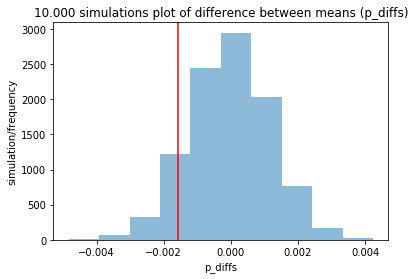

In [30]:
plt.hist(p_diffs, alpha=.5)
plt.axvline(x = obs_diff, color = 'red')
plt.xlabel('p_diffs')
plt.ylabel('simulation/frequency')
plt.title('10.000 simulations plot of difference between means (p_diffs)')

__Confidence Intervals:__<br>
Confidence Coefficient = 1- $\alpha$ = 1-0.05 = 0.95<br>
Confidence Levels = 0.95 * 100 = 95%

In [31]:
left_p = np.percentile(p_diffs,2.5)
right_p = np.percentile(p_diffs,97.5)

Text(0.5, 1.0, '10.000 simulations plot of difference between means (p_diffs) with percentiles')

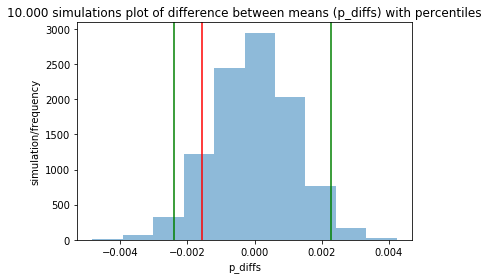

In [32]:
plt.hist(p_diffs, alpha=.5)
plt.axvline(x = obs_diff, color = 'red')
plt.axvline(x = left_p, color = 'green')
plt.axvline(x = right_p, color = 'green')
plt.xlabel('p_diffs')
plt.ylabel('simulation/frequency')
plt.title('10.000 simulations plot of difference between means (p_diffs) with percentiles')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [33]:
# Here are 10000 draws from the sampling distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size) 

Text(0.5, 1.0, 'normal sampling distribution plot of difference between means (p_diffs)')

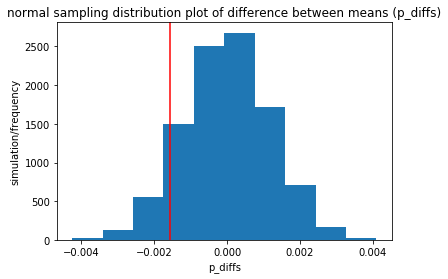

In [34]:
plt.hist(null_vals)
plt.axvline(x = obs_diff, color = 'red')
plt.xlabel('p_diffs')
plt.ylabel('simulation/frequency')
plt.title('normal sampling distribution plot of difference between means (p_diffs)')

In [35]:
# right tailed, following alternative hypothesis
(null_vals > obs_diff).mean()

0.9075

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

- The last porpotion computed is the **p-value**, **p-value** is the probability of obtaining the observed statisc ( _obs_diff_ ) in favor of the alternative hypothesis 

- The sampling distribution is well shaped and the most data points are within the confidence intervals, this means there is a 95% propability of the observed means falls between the bounds obtained

- Large **p-value** suggests that we shouldn´t move away from the Null hypothesis, also if we're considering **alpha = 0.05** ( _Type I error_ ) and for this case the **p_value** > **alpha**, this means we fail to reject the Null hypothesis. 

- In conclusion, we could observed that the Null hypothesis is true and this means the conversion rate for the old page is a slightly better than the new page, i said "slightly" because the differeces between the conversions is very small

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [36]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

convert_old = df2[df2['group']=='control'].converted.sum()
convert_new = df2[df2['group']=='treatment'].converted.sum()
n_old = df2[df2["group"]=='control'].shape[0]
n_new =  df2[df2["group"]=='treatment'].shape[0]

print ("- Old page conversion: {}".format(convert_old))
print ("- New page conversion: {}".format(convert_new))
print ("- Rows associated with the old page: {}".format(n_old))
print ("- Rows associated with the new page: {}".format(n_new))

- Old page conversion: 17489
- New page conversion: 17264
- Rows associated with the old page: 145274
- Rows associated with the new page: 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [37]:
counts = np.array([convert_new, convert_old])
nobs = np.array([n_new, n_old])

stat, pval = proportions_ztest(counts, nobs, alternative='larger')
print(stat, pval)

-1.3109241984234394 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

- __zstat__ o ( _z-score_ ),  It's the number of standard deviations from the mean a data point.
- __pval__, it's the __p-value__

The __p-value__ considering larger alternative is 0.905, this value is very similar to the one found in parts __j__ and __k__.
Hence, we are failed to reject the null hypothesis in favor of the alternative hypothesis

_zstat reference -> https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/z-score/_

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**, it's used to predict only two possible outcome ( _conversion or no conversion_ ) and also the response variable is categorical no quantitative

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [38]:
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df["group"])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [39]:
model_log = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
result = model_log.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [40]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 27 Nov 2019   Pseudo R-squ.:               8.077e-06
Time:                        15:11:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [41]:
c_intercept = 1/np.exp(-1.9888)
c_abpage = 1/np.exp(-0.0150)

print("new coef incercept: {}".format(c_intercept))
print("new coef ab_page: {}".format(c_abpage))

new coef incercept: 7.3067603868728614
new coef ab_page: 1.015113064615719


e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

- For treatment group, it's 1.015 times less likely to convert than the control group holding all other variables constant
- The __p_value__ associated with __ab_page__ is 0.190, determinates this variable is _statistical significant_ for predicting the conversion

- It differs from the __p_value__ in __Part II__ because the way to setup the Null and Alternative hypothesis is totally different, for regression models the hyphotesis are declare like this:

$$H_{0}: \beta_{1} = 0 $$

$$H_{1}: \beta_{1} \neq 0 $$

__Slope__ ($\beta_{1}$, $b_{1}$), it's the expected change in the response for each 1 unit increase in the explanatory variable, where $\beta_{1}$ is the parameter

Basically the hypothesis here are:

$H_{0}$: The new page is not better or even worse that the old version <br>
$H_{1}$: The new page is better than the old one

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

- There are A/B drawbacks that could affect the results, these are: <br>
    __Change aversion__ : Existing users may give an unfair advantage to the old version <br>
    __Novelty effect__ : Existing users may give an unfair advantage to the new version 

- Also, there are other problems in regression models: <br>
    - A linear relationship doesn´t exist <br>
    - Correlated error
    - Non-constant variables
    - Outliers
    - Multicolliarity, strong correlation between explanatory variables
    
To identify __multicolliarity__, it is advisable to use a scatterplot matrix between variables to check the strength between them and get the VIF ( _Variance Inflaction Factor_ ) for each variable. When the __VIF > 10__, the variable should be removed from the model 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [42]:
countries_df = pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [43]:
countries_df.info() #user_id has same data type as df2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 2 columns):
user_id    290584 non-null int64
country    290584 non-null object
dtypes: int64(1), object(1)
memory usage: 4.4+ MB


In [44]:
df3 = df2.join(countries_df, rsuffix='_c', how='inner')
df3.drop(columns = 'user_id_c', inplace=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286742 entries, 0 to 290583
Data columns (total 8 columns):
user_id         286742 non-null int64
timestamp       286742 non-null object
group           286742 non-null object
landing_page    286742 non-null object
converted       286742 non-null int64
intercept       286742 non-null int64
ab_page         286742 non-null uint8
country         286742 non-null object
dtypes: int64(3), object(4), uint8(1)
memory usage: 17.8+ MB


In [45]:
df3[['CA','UK','US']] = pd.get_dummies(df3['country'])
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,UK,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,UK,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,UK,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,UK,0,1,0


In [46]:
#removing CA in the model
model_log3 = sm.Logit(df3['converted'], df3[['intercept','ab_page','UK','US']])
result3 = model_log3.fit()
result3.summary()

Optimization terminated successfully.
         Current function value: 0.366154
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               286742
Model:                          Logit   Df Residuals:                   286738
Method:                           MLE   Df Model:                            3
Date:                Wed, 27 Nov 2019   Pseudo R-squ.:               1.523e-05
Time:                        15:11:36   Log-Likelihood:            -1.0499e+05
converged:                       True   LL-Null:                   -1.0499e+05
Covariance Type:            nonrobust   LLR p-value:                    0.3620
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0145      0.027    -75.614      0.000      -2.067      -1.962
ab_page       -0.0158      0.012     -1.376      0.169      -0.038       0.007
UK             0.0323      0.028      1.134      0.257      -0.023       0.088
US             0.0260      0.027      0.968      0.333      -0.027       0.079
==============================================================================
"""

In [47]:
c_intercept = 1/np.exp(-2.0123)
c_abpage = 1/np.exp(-0.0150)
c_UK = np.exp(0.0296)
c_US = np.exp(0.0234)

print("new coef incercept: {}".format(c_intercept))
print("new coef ab_page: {}".format(c_abpage))
print("new coef UK: {}".format(c_UK))
print("new coef US: {}".format(c_US))

new coef incercept: 7.480502732835484
new coef ab_page: 1.015113064615719
new coef UK: 1.0300424345653076
new coef US: 1.0236759280352754


- Conversion is 1.030 times as likely in UK than CA, holding all variables constant
- Conversion is 1.023 times as likely in US than CA, holding all variables constant
- The __p_values__ for UK and US determinates these variables are statistical significant for predicting the conversion

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [48]:
df3['ab_page_CA'] = df3['ab_page']*df3['CA']
df3['ab_page_UK'] = df3['ab_page']*df3['UK']
df3['ab_page_US'] = df3['ab_page']*df3['US']
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,ab_page_CA,ab_page_UK,ab_page_US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,UK,0,1,0,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,UK,0,1,0,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,UK,0,1,0,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,UK,0,1,0,0,0,0


In [49]:
model_log4 = sm.Logit(df3['converted'], df3[['intercept','ab_page_UK','ab_page_US']])
result4 = model_log4.fit()
result4.summary()

Optimization terminated successfully.
         Current function value: 0.366155
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               286742
Model:                          Logit   Df Residuals:                   286739
Method:                           MLE   Df Model:                            2
Date:                Wed, 27 Nov 2019   Pseudo R-squ.:               1.146e-05
Time:                        15:11:43   Log-Likelihood:            -1.0499e+05
converged:                       True   LL-Null:                   -1.0499e+05
Covariance Type:            nonrobust   LLR p-value:                    0.3003
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9884      0.008   -251.097      0.000      -2.004      -1.973
ab_page_UK    -0.0073      0.018     -0.400      0.689      -0.043       0.028
ab_page_US    -0.0195      0.013     -1.550      0.121      -0.044       0.005
==============================================================================
"""

In [50]:
c_intercept = 1/np.exp(-1.9884)
c_abpage_UK = 1/np.exp(-0.0073)
c_abpage_US = 1/np.exp(-0.0195)


print("new coef incercept: {}".format(c_intercept))
print("new coef ab_page and UK: {}".format(c_abpage_UK))
print("new coef ab_page and US: {}".format(c_abpage_US))

new coef incercept: 7.303838267181013
new coef ab_page and UK: 1.0073267099546657
new coef ab_page and US: 1.0196913668606584


- For each 1 unit decrease on treatment group in UK, conversion is 1.007 times as likely holding all variables constant 
- For each 1 unit decrease on treatment group in US, conversion is 1.019 times as likely holding all variables constant 

## Conclusions

This project is to understand the result of an A/B test run by an e-commerce website.
The goal is to help the company understand if they should implement this new page or keep the old page.

_Based on the result obtained working through this notebook, we can conclude the old page converts better than the new page_

To conclude this, the project was divided in 2 parts:

__Part II__, with a large __p_value__ ( _0.9075_ ) we failed to reject our Null Hypothesis 

__Part III__, applying a Logist Regression model we conclude exactly the same, with __p_value__ ( _0.190_ ) greater than $\alpha = 0.05$, we don´t reject the Null hypothesis in favor of the alternative hypothesis

Besides, a new categorial variable was included in our model to analyze whether the conversion of the new page improve, this new variable was the country where user lives in, but the result obtained was the same. I think this variable was inserted to see if there is a simpson's paradox, where the way we choose to look at our data lead to completely differents results

_For all these reasons we suggest to the company don´t implement the new page_